In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

In [2]:
######################
# FUNCTIONS
######################

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [3]:
######################
# Load dataset
######################

######################
# ANT
#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
nlayers = 500
acc_t = 1440 #minutes
ini_date_idx=136 #56=13Mar 64=14Mar 104=19Mar 136=23Mar 152=25Mar
end_date_idx=138

###load data###
snpack_files = '/snpack/snowpack_'+domain+'_*'# Load netcdf
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

################
#hist
print('Charging Ant hist...')
wrflist_sp = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
#sp_VolI_hist = wrf.getvar(wrflist_sp, 'SN_VOLI', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers,:,:]
sp_VolW_hist = wrf.getvar(wrflist_sp, 'SN_VOLW', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_VolA_hist = wrf.getvar(wrflist_sp, 'SN_VOLV', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_dens_hist = 917.0*(1 - sp_VolA_hist - sp_VolW_hist) + 1000.0*sp_VolW_hist + 1.3*sp_VolA_hist
sp_thick_hist =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
#x = wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers+1,:,:].cumsum(axis=1)
#sp_depth_hist = (x[:,1:,:,:] + x[:,:-1,:,:]) / 2
del sp_VolW_hist
#del wrflist_sp

################
#past
print('Charging Ant past...')
wrflist_sp = []
proj = 'past_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
#sp_VolI_past = wrf.getvar(wrflist_sp, 'SN_VOLI', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers,:,:]
sp_VolW_past = wrf.getvar(wrflist_sp, 'SN_VOLW', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_VolA_past = wrf.getvar(wrflist_sp, 'SN_VOLV', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_dens_past = 917.0*(1 - sp_VolA_past - sp_VolW_past) + 1000.0*sp_VolW_past + 1.3*sp_VolA_past
sp_thick_past =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
#x = wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers+1,:,:].cumsum(axis=1)
#sp_depth_past = (x[:,1:,:,:] + x[:,:-1,:,:]) / 2
del sp_VolW_past
#del wrflist_sp


################
#ssp245
print('Charging Ant ssp245...')
wrflist_sp = []
proj = 'ssp245_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
#sp_VolI_ssp245 = wrf.getvar(wrflist_sp, 'SN_VOLI', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers,:,:]
sp_VolW_ssp245 = wrf.getvar(wrflist_sp, 'SN_VOLW', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_VolA_ssp245 = wrf.getvar(wrflist_sp, 'SN_VOLV', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_dens_ssp245 = 917.0*(1 - sp_VolA_ssp245 - sp_VolW_ssp245) + 1000.0*sp_VolW_ssp245 + 1.3*sp_VolA_ssp245
sp_thick_ssp245 =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
#x = wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers+1,:,:].cumsum(axis=1)
#sp_depth_ssp245 = (x[:,1:,:,:] + x[:,:-1,:,:]) / 2
del sp_VolW_ssp245
#del wrflist_sp


################
#ssp245
print('Charging Ant ssp585...')
wrflist_sp = []
proj = 'ssp585_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
#sp_VolI_ssp585 = wrf.getvar(wrflist_sp, 'SN_VOLI', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers,:,:]
sp_VolW_ssp585 = wrf.getvar(wrflist_sp, 'SN_VOLW', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_VolA_ssp585 = wrf.getvar(wrflist_sp, 'SN_VOLV', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_dens_ssp585 = 917.0*(1 - sp_VolA_ssp585 - sp_VolW_ssp585) + 1000.0*sp_VolW_ssp585 + 1.3*sp_VolA_ssp585
sp_thick_ssp585 =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
#x = wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:nlayers+1,:,:].cumsum(axis=1)
#sp_depth_ssp585 = (x[:,1:,:,:] + x[:,:-1,:,:]) / 2
del sp_VolW_ssp585


######################
# ANT COORDINATES
print('Charging coordinates...')
# Get surface fix variables
height = wrf.getvar(wrflist_sp, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(sp_VolA_hist)
times = wrf.extract_times(wrflist_sp, timeidx=wrf.ALL_TIMES)[[72,112,160]]

Charging Ant hist...
Total: 59
Charging Ant past...
Total: 59
Charging Ant ssp245...
Total: 59
Charging Ant ssp585...
Total: 60
Charging coordinates...


In [4]:
#Positions
CON_xy = wrf.ll_to_xy(wrflist_sp, -75.09978, 123.332196) #Concordia
CON_ll = wrf.xy_to_ll(wrflist_sp, CON_xy[0], CON_xy[1])
DDU_xy = wrf.ll_to_xy(wrflist_sp, -66.662778, 140.001111) #DDU
DDU_ll = wrf.xy_to_ll(wrflist_sp, DDU_xy[0], DDU_xy[1])
CIS_xy = wrf.ll_to_xy(wrflist_sp, -66.033333, 103.55) #DDU
CIS_ll = wrf.xy_to_ll(wrflist_sp, CIS_xy[0], CIS_xy[1])
MER_xy = wrf.ll_to_xy(wrflist_sp, -67.500000, 144.75) #Mertz
MER_ll = wrf.xy_to_ll(wrflist_sp, MER_xy[0], MER_xy[1])

In [5]:
######################
# Calculate FAC
######################

# Calculate mask
mask_hist = xr.where((sp_thick_hist == -999.) | (sp_VolA_hist == -999.) | (sp_VolA_hist == 0), 0, 1)
mask_past = xr.where((sp_thick_past == -999.) | (sp_VolA_past == -999.) | (sp_VolA_past == 0), 0, 1)
mask_ssp245 = xr.where((sp_thick_ssp245 == -999.) | (sp_VolA_ssp245 == -999.) | (sp_VolA_ssp245 == 0), 0, 1)
mask_ssp585 = xr.where((sp_thick_ssp585 == -999.) | (sp_VolA_ssp585 == -999.) | (sp_VolA_ssp585 == 0), 0, 1)

# Mask arrays
print('Masking arrays...')
#sp_VolI_hist_msk = sp_VolI_hist * mask_hist
#sp_VolW_hist_msk = sp_VolW_hist * mask_hist
sp_VolA_hist_msk = sp_VolA_hist * mask_hist
sp_dens_hist_msk = sp_dens_hist * mask_hist
sp_thick_hist_msk = sp_thick_hist * mask_hist
#del sp_VolW_hist
del sp_VolA_hist
del sp_dens_hist
del sp_thick_hist
del mask_hist

#sp_VolI_past_msk = sp_VolI_past * mask_past
#sp_VolW_past_msk = sp_VolW_past * mask_past
sp_VolA_past_msk = sp_VolA_past * mask_past
sp_dens_past_msk = sp_dens_past * mask_past
sp_thick_past_msk = sp_thick_past * mask_past
#del sp_VolW_past
del sp_VolA_past
del sp_dens_past
del sp_thick_past
del mask_past

#sp_VolI_ssp245_msk = sp_VolI_ssp245 * mask_ssp245
#sp_VolW_ssp245_msk = sp_VolW_ssp245 * mask_ssp245
sp_VolA_ssp245_msk = sp_VolA_ssp245 * mask_ssp245
sp_dens_ssp245_msk = sp_dens_ssp245 * mask_ssp245
sp_thick_ssp245_msk = sp_thick_ssp245 * mask_ssp245
#del sp_VolW_ssp245
del sp_VolA_ssp245
del sp_dens_ssp245
del sp_thick_ssp245
del mask_ssp245

#sp_VolI_ssp585_msk = sp_VolI_ssp585 * mask_ssp585
#sp_VolW_ssp585_msk = sp_VolW_ssp585 * mask_ssp585
sp_VolA_ssp585_msk = sp_VolA_ssp585 * mask_ssp585
sp_dens_ssp585_msk = sp_dens_ssp585 * mask_ssp585
sp_thick_ssp585_msk = sp_thick_ssp585 * mask_ssp585
#del sp_VolW_ssp585
del sp_VolA_ssp585
del sp_dens_ssp585
del sp_thick_ssp585
del mask_ssp585

# FAC calculation
print('Calculating FAC...')
sp_FAC_hist = (sp_VolA_hist_msk * sp_thick_hist_msk).sum(axis=1)
sp_FAC_past = (sp_VolA_past_msk * sp_thick_past_msk).sum(axis=1)
sp_FAC_ssp245 = (sp_VolA_ssp245_msk * sp_thick_ssp245_msk).sum(axis=1)
sp_FAC_ssp585 = (sp_VolA_ssp585_msk * sp_thick_ssp585_msk).sum(axis=1)

# FWC calculation
#print('Calculating FWC...')
#sp_FWC_hist = (sp_VolW_hist_msk * sp_thick_hist_msk).sum(axis=1)
#sp_FWC_past = (sp_VolW_past_msk * sp_thick_past_msk).sum(axis=1)
#sp_FWC_ssp245 = (sp_VolW_ssp245_msk * sp_thick_ssp245_msk).sum(axis=1)
#sp_FWC_ssp585 = (sp_VolW_ssp585_msk * sp_thick_ssp585_msk).sum(axis=1)

#Ice lenses calculation
print('Calculating Ice lenses thickness...')
ice_lens_hist = xr.where(sp_dens_hist_msk > 830, 1, 0)
ice_lens_past = xr.where(sp_dens_past_msk > 830, 1, 0)
ice_lens_ssp245 = xr.where(sp_dens_ssp245_msk > 830, 1, 0)
ice_lens_ssp585 = xr.where(sp_dens_ssp585_msk > 830, 1, 0)
ice_lens_thick_hist = (ice_lens_hist * sp_thick_hist_msk).sum(axis=1)
ice_lens_thick_past = (ice_lens_past * sp_thick_past_msk).sum(axis=1)
ice_lens_thick_ssp245 = (ice_lens_ssp245 * sp_thick_ssp245_msk).sum(axis=1)
ice_lens_thick_ssp585 = (ice_lens_ssp585 * sp_thick_ssp585_msk).sum(axis=1)

Masking arrays...
Calculating FAC...
Calculating Ice lenses thickness...


## Liquid water content

In [6]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

In [7]:
######################
# FUNCTIONS
######################

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [8]:
######################
# Load dataset
######################

######################
# ANT
#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
nlayers = 500
acc_t = 1440 #minutes
ini_date_idx=136 #56=13Mar 64=14Mar 104=19Mar 136=23Mar 152=25Mar
end_date_idx=138

###load data###
snpack_files = '/snpack/snowpack_'+domain+'_*'# Load netcdf
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

################
#hist
print('Charging Ant hist...')
wrflist_sp = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
sp_VolW_hist = wrf.getvar(wrflist_sp, 'SN_VOLW', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_thick_hist =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]

################
#past
print('Charging Ant past...')
wrflist_sp = []
proj = 'past_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
sp_VolW_past = wrf.getvar(wrflist_sp, 'SN_VOLW', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_thick_past =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]


################
#ssp245
print('Charging Ant ssp245...')
wrflist_sp = []
proj = 'ssp245_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
sp_VolW_ssp245 = wrf.getvar(wrflist_sp, 'SN_VOLW', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_thick_ssp245 =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]


################
#ssp585
print('Charging Ant ssp585...')
wrflist_sp = []
proj = 'ssp585_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+snpack_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+snpack_files))):
        print(i, end="\r")
        wrflist_sp.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
sp_VolW_ssp585 = wrf.getvar(wrflist_sp, 'SN_VOLW', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]
sp_thick_ssp585 =  wrf.getvar(wrflist_sp, 'SN_THICK', timeidx=wrf.ALL_TIMES)[[72,112,160],:nlayers,:,:]


######################
# ANT COORDINATES
print('Charging coordinates...')
# Get surface fix variables
height = wrf.getvar(wrflist_sp, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(sp_VolW_hist)
times = wrf.extract_times(wrflist_sp, timeidx=wrf.ALL_TIMES)[[72,112,160]]

Charging Ant hist...
Total: 59
Charging Ant past...
Total: 59
Charging Ant ssp245...
Total: 59
Charging Ant ssp585...
Total: 60
Charging coordinates...


In [9]:
######################
# Calculate FAC
######################

# Calculate mask
mask_hist = xr.where((sp_thick_hist == -999.) | (sp_VolW_hist == -999.) | (sp_VolW_hist == 0), 0, 1)
mask_past = xr.where((sp_thick_past == -999.) | (sp_VolW_past == -999.) | (sp_VolW_past == 0), 0, 1)
mask_ssp245 = xr.where((sp_thick_ssp245 == -999.) | (sp_VolW_ssp245 == -999.) | (sp_VolW_ssp245 == 0), 0, 1)
mask_ssp585 = xr.where((sp_thick_ssp585 == -999.) | (sp_VolW_ssp585 == -999.) | (sp_VolW_ssp585 == 0), 0, 1)

# Mask arrays
print('Masking arrays...')
sp_VolW_hist_msk = sp_VolW_hist * mask_hist
sp_thick_hist_msk = sp_thick_hist * mask_hist
del sp_VolW_hist
del sp_thick_hist
del mask_hist

sp_VolW_past_msk = sp_VolW_past * mask_past
sp_thick_past_msk = sp_thick_past * mask_past
del sp_VolW_past
del sp_thick_past
del mask_past

sp_VolW_ssp245_msk = sp_VolW_ssp245 * mask_ssp245
sp_thick_ssp245_msk = sp_thick_ssp245 * mask_ssp245
del sp_VolW_ssp245
del sp_thick_ssp245
del mask_ssp245

sp_VolW_ssp585_msk = sp_VolW_ssp585 * mask_ssp585
sp_thick_ssp585_msk = sp_thick_ssp585 * mask_ssp585
del sp_VolW_ssp585
del sp_thick_ssp585
del mask_ssp585

# FAC calculation
print('Calculating FWC...')
sp_FWC_hist = (sp_VolW_hist_msk * sp_thick_hist_msk).sum(axis=1)
sp_FWC_past = (sp_VolW_past_msk * sp_thick_past_msk).sum(axis=1)
sp_FWC_ssp245 = (sp_VolW_ssp245_msk * sp_thick_ssp245_msk).sum(axis=1)
sp_FWC_ssp585 = (sp_VolW_ssp585_msk * sp_thick_ssp585_msk).sum(axis=1)

Masking arrays...
Calculating FWC...


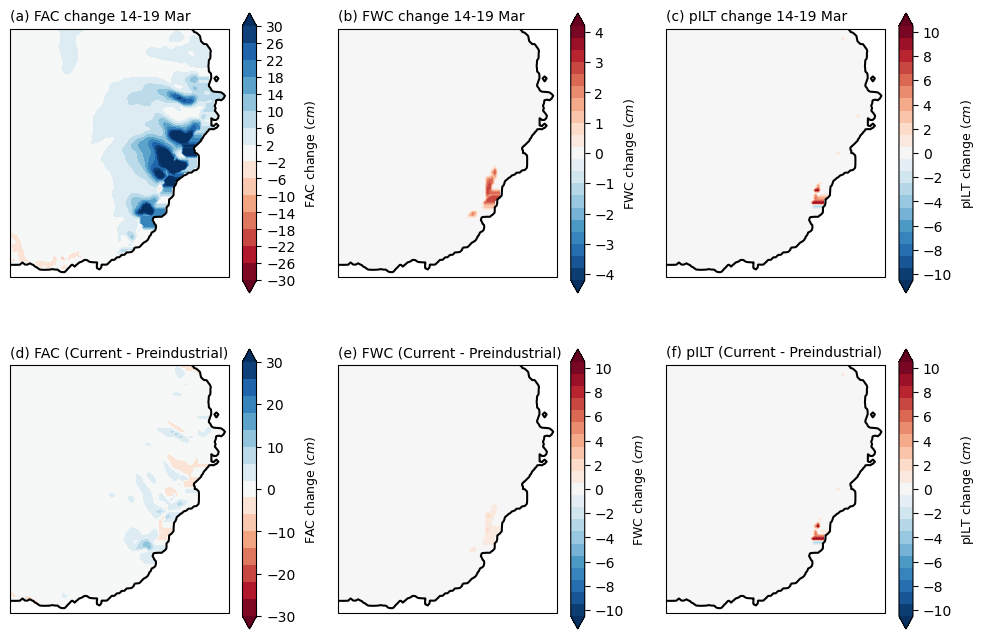

In [14]:
#############################################
# Plot terrein map
#############################################

min_height = 10
time_ini = 80
time_end = 0
#time_ix = 40
  
#################
### Plot Current ###
#Figure and axis
fig = plt.figure(figsize=[12,8])


### Change
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.SouthPolarStereo())
CS1 = ax1.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill1 = ax1.contourf((sp_FAC_hist[1,:,:].where(height > min_height) - sp_FAC_hist[0,:,:].where(height > min_height))*100, levels=np.arange(-30,31,4), cmap='RdBu', extend="both")
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.SouthPolarStereo())
CS2 = ax2.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill2 = ax2.contourf((sp_FWC_hist[1,:,:].where(height > min_height) - sp_FWC_hist[0,:,:].where(height > min_height))*100, levels=np.arange(-4.2,4.5,0.4), cmap='RdBu_r', extend="both")
ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.SouthPolarStereo())
CS3 = ax3.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill3 = ax3.contourf((ice_lens_thick_hist[1,:,:].where(height > min_height) - ice_lens_thick_hist[0,:,:].where(height > min_height))*100, levels=np.arange(-10.5,10.6,1), cmap='RdBu_r', extend="both")

### Current changes
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.SouthPolarStereo())
CS4 = ax4.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill4 = ax4.contourf((sp_FAC_hist[1,:,:].where(height > min_height) - sp_FAC_past[1,:,:].where(height > min_height))*100, levels=np.arange(-30,31,4), cmap='RdBu', extend="both")
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.SouthPolarStereo())
CS5 = ax5.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill5 = ax5.contourf((sp_FWC_hist[1,:,:].where(height > min_height) - sp_FWC_past[1,:,:].where(height > min_height))*100, levels=np.arange(-10.5,10.6,1), cmap='RdBu_r', extend="both")
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.SouthPolarStereo())
CS6 = ax6.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill6 = ax6.contourf((ice_lens_thick_hist[1,:,:].where(height > min_height) - ice_lens_thick_past[1,:,:].where(height > min_height))*100, levels=np.arange(-10.5,10.6,1), cmap='RdBu_r', extend="both")


#Extent
ax1.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax2.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax3.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax4.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax5.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax6.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())

#Titles
ax1.set_title('(a) FAC change 14-19 Mar', loc='left', fontsize=10)
ax2.set_title('(b) FWC change 14-19 Mar', loc='left', fontsize=10)
ax3.set_title('(c) pILT change 14-19 Mar', loc='left', fontsize=10)
ax4.set_title('(d) FAC (Current - Preindustrial)', loc='left', fontsize=10)
ax5.set_title('(e) FWC (Current - Preindustrial)', loc='left', fontsize=10)
ax6.set_title('(f) pILT (Current - Preindustrial)', loc='left', fontsize=10)

#Title
#cbar_ax1 = fig.add_axes([0.90, 0.55, 0.02, 0.3])
#cbar_ax2 = fig.add_axes([0.90, 0.05, 0.02, 0.3])
cbar1 = fig.colorbar(fill1, ticks=np.arange(-30,30.1,4), ax=ax1)
cbar2 = fig.colorbar(fill2, ticks=np.arange(-4,4.1,1), ax=ax2)
cbar3 = fig.colorbar(fill3, ticks=np.arange(-10,10.1,2), ax=ax3)
cbar4 = fig.colorbar(fill4, ticks=np.arange(-30,30.1,10), ax=ax4)
cbar5 = fig.colorbar(fill5, ticks=np.arange(-10,10.1,2), ax=ax5)
cbar6 = fig.colorbar(fill6, ticks=np.arange(-10,10.1,2), ax=ax6)

cbar1.set_label('FAC change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar2.set_label('FWC change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar3.set_label('pILT change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar4.set_label('FAC change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar5.set_label('FWC change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar6.set_label('pILT change ($cm$)', rotation=90, labelpad=5, fontsize=9)


#ax1.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
#ax1.plot(wrf.to_np(DDU_xy)[0], wrf.to_np(DDU_xy)[1], 'k.', markersize=10)
#ax1.plot(wrf.to_np(CIS_xy)[0], wrf.to_np(CIS_xy)[1], 'k.', markersize=10)
#ax1.plot(194, 60, 'k.', markersize=10)

#cbar = plt.colorbar(fill1) #, ticks=np.arange(-5,5.1,1), shrink=0.8)
#cbar.set_label('T upper snow layer ($^\circ C$)', rotation=270, labelpad=10)

#title1 = plt.title(str(times[time_ix])[:-16], fontsize=10)

plt.savefig('Extended_Figure_4.png', dpi=300, bbox_inches = 'tight')

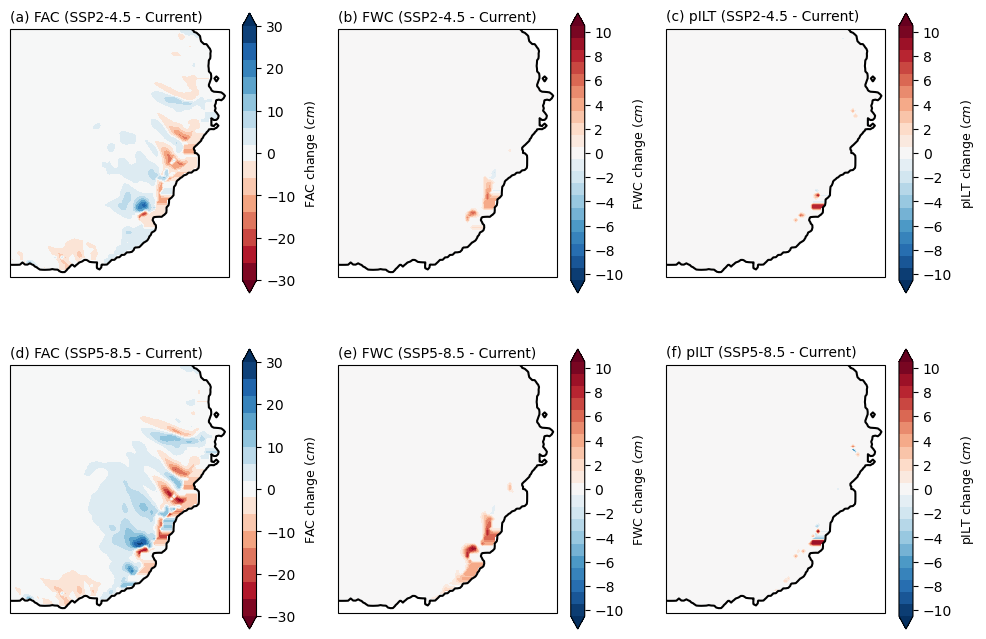

In [13]:
#############################################
# Plot terrein map
#############################################

min_height = 10
time_ini = 80
time_end = 0
#time_ix = 40
  
#################
### Plot Current ###
#Figure and axis
fig = plt.figure(figsize=[12,8])


### Change
ax1 = fig.add_subplot(2, 3, 1, projection=ccrs.SouthPolarStereo())
CS1 = ax1.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill1 = ax1.contourf((sp_FAC_ssp245[1,:,:].where(height > min_height) - sp_FAC_hist[1,:,:].where(height > min_height))*100, levels=np.arange(-30,31,4), cmap='RdBu', extend="both")
ax2 = fig.add_subplot(2, 3, 2, projection=ccrs.SouthPolarStereo())
CS2 = ax2.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill2 = ax2.contourf((sp_FWC_ssp245[1,:,:].where(height > min_height) - sp_FWC_hist[1,:,:].where(height > min_height))*100, levels=np.arange(-10.5,10.6,1), cmap='RdBu_r', extend="both")
ax3 = fig.add_subplot(2, 3, 3, projection=ccrs.SouthPolarStereo())
CS3 = ax3.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill3 = ax3.contourf((ice_lens_thick_ssp245[1,:,:].where(height > min_height) - ice_lens_thick_hist[1,:,:].where(height > min_height))*100, levels=np.arange(-10.5,10.6,1), cmap='RdBu_r', extend="both")

### Current changes
ax4 = fig.add_subplot(2, 3, 4, projection=ccrs.SouthPolarStereo())
CS4 = ax4.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill4 = ax4.contourf((sp_FAC_ssp585[1,:,:].where(height > min_height) - sp_FAC_hist[1,:,:].where(height > min_height))*100, levels=np.arange(-30,31,4), cmap='RdBu', extend="both")
ax5 = fig.add_subplot(2, 3, 5, projection=ccrs.SouthPolarStereo())
CS5 = ax5.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill5 = ax5.contourf((sp_FWC_ssp585[1,:,:].where(height > min_height) - sp_FWC_hist[1,:,:].where(height > min_height))*100, levels=np.arange(-10.5,10.6,1), cmap='RdBu_r', extend="both")
ax6 = fig.add_subplot(2, 3, 6, projection=ccrs.SouthPolarStereo())
CS6 = ax6.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
fill6 = ax6.contourf((ice_lens_thick_ssp585[1,:,:].where(height > min_height) - ice_lens_thick_hist[1,:,:].where(height > min_height))*100, levels=np.arange(-10.5,10.6,1), cmap='RdBu_r', extend="both")


#Extent
ax1.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax2.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax3.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax4.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax5.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax6.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())

#Titles
ax1.set_title('(a) FAC (SSP2-4.5 - Current)', loc='left', fontsize=10)
ax2.set_title('(b) FWC (SSP2-4.5 - Current)', loc='left', fontsize=10)
ax3.set_title('(c) pILT (SSP2-4.5 - Current)', loc='left', fontsize=10)
ax4.set_title('(d) FAC (SSP5-8.5 - Current)', loc='left', fontsize=10)
ax5.set_title('(e) FWC (SSP5-8.5 - Current)', loc='left', fontsize=10)
ax6.set_title('(f) pILT (SSP5-8.5 - Current)', loc='left', fontsize=10)

#Title
#cbar_ax1 = fig.add_axes([0.90, 0.55, 0.02, 0.3])
#cbar_ax2 = fig.add_axes([0.90, 0.05, 0.02, 0.3])
cbar1 = fig.colorbar(fill4, ticks=np.arange(-30,30.1,10), ax=ax1)
cbar2 = fig.colorbar(fill5, ticks=np.arange(-10,10.1,2), ax=ax2)
cbar3 = fig.colorbar(fill6, ticks=np.arange(-10,10.1,2), ax=ax3)
cbar4 = fig.colorbar(fill4, ticks=np.arange(-30,30.1,10), ax=ax4)
cbar5 = fig.colorbar(fill5, ticks=np.arange(-10,10.1,2), ax=ax5)
cbar6 = fig.colorbar(fill6, ticks=np.arange(-10,10.1,2), ax=ax6)

cbar1.set_label('FAC change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar2.set_label('FWC change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar3.set_label('pILT change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar4.set_label('FAC change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar5.set_label('FWC change ($cm$)', rotation=90, labelpad=5, fontsize=9)
cbar6.set_label('pILT change ($cm$)', rotation=90, labelpad=5, fontsize=9)


#ax1.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
#ax1.plot(wrf.to_np(DDU_xy)[0], wrf.to_np(DDU_xy)[1], 'k.', markersize=10)
#ax1.plot(wrf.to_np(CIS_xy)[0], wrf.to_np(CIS_xy)[1], 'k.', markersize=10)
#ax1.plot(194, 60, 'k.', markersize=10)

#cbar = plt.colorbar(fill1) #, ticks=np.arange(-5,5.1,1), shrink=0.8)
#cbar.set_label('T upper snow layer ($^\circ C$)', rotation=270, labelpad=10)

#title1 = plt.title(str(times[time_ix])[:-16], fontsize=10)

plt.savefig('Figure_6.png', dpi=300, bbox_inches = 'tight')